##  Crime Rates Dataset 
### Load the dataset via a URL

In [ ]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
crime_rates = pd.read_csv('https://raw.githubusercontent.com/' +
                      'csbfx/advpy122-data/master/crime_rates.csv') 

### View some of the rows

In [ ]:
crime_rates.head()

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


In [ ]:
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     2200 non-null   object 
 1   Year                      2200 non-null   int64  
 2   Population                2200 non-null   int64  
 3   Violent Crime Rate        2200 non-null   float64
 4   Murder Rate               2200 non-null   float64
 5   Forcible Rape Rate        2200 non-null   float64
 6   Robbery Rate              2200 non-null   float64
 7   Aggraveted Assault Rate   2200 non-null   float64
 8   Property Crime Rate       2200 non-null   float64
 9   Burglary Rate             2200 non-null   float64
 10  Larceny & Theft Rate      2200 non-null   float64
 11  Motor Vehicle Theft Rate  2200 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 206.4+ KB


### Customize the column names

In [ ]:
crime_rates.columns = ['state', 'year', 'pop', 'violent', 'murder', \
                       'rape', 'robbery', 'assault', 'property', \
                       'burglary', 'larceny','vehicle']

In [ ]:
crime_rates.head(3)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


## Select data from DataFrame

### Select rows with specific column value

In [ ]:
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
alaska_crimes.head(5)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


### Indexing in pandas
The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `iloc` and `loc`. For more advanced operations, these are the ones you're supposed to be using.

#### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data.`iloc` follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [ ]:
crime_rates.iloc[0] # first row

state        Alaska
year           1960
pop          226167
violent      104.30
murder        10.20
rape          20.80
robbery       28.30
assault       45.10
property   1,544.90
burglary     332.10
larceny      970.50
vehicle      242.30
Name: 0, dtype: object

In [ ]:
# python index
#[start:stop:skip] # stop is exclusive [1:3] --> index 1 & 2.
#[1::2, :] # from the 2nd row all the way to the end every other row, and all the columns
#[:, :3] # all rows, from the beginning to the 3rd column (0, 1, 2)

crime_rates.iloc[0:10:2, 3:5]

,violent,murder
0,104.30,10.20
2,91.50,4.50
4,150.00,10.40
6,150.40,12.90
8,175.50,10.50


Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:

In [ ]:
crime_rates.iloc[:, 0] # all rows, first column

0        Alaska
1        Alaska
2        Alaska
3        Alaska
4        Alaska
         ...   
2195    Wyoming
2196    Wyoming
2197    Wyoming
2198    Wyoming
2199    Wyoming
Name: state, Length: 2200, dtype: object

On its own, the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [ ]:
crime_rates.iloc[:3, 3:]

,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


#### Label-based selection
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [ ]:
crime_rates.loc[:, ['year', 'state', 'pop']]

,year,state,pop
0,1960,Alaska,226167
1,1961,Alaska,234000
2,1962,Alaska,246000
3,1963,Alaska,248000
4,1964,Alaska,250000
...,...,...,...
2195,1999,Wyoming,480000
2196,2000,Wyoming,493782
2197,2001,Wyoming,494423
2198,2002,Wyoming,498830


## Simple data analysis
Let's take a look at the crime rates in Alaska throughout the years.

In [ ]:
# Select crimes data for state of Alaska
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
# Set the year as the index of the DataFrame
alaska_crimes_by_year = alaska_crimes.set_index('year')
alaska_crimes_by_year.head(5)

,state,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
year,,,,,,,,,,,
1960,Alaska,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1961,Alaska,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
1962,Alaska,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
1963,Alaska,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
1964,Alaska,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


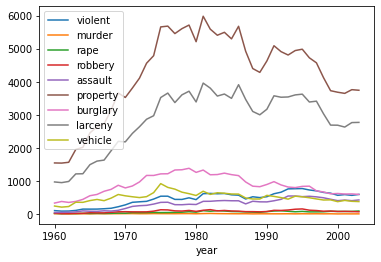

In [ ]:
# Use iloc to select all rows and all the columns about crime rates
# Use plot.line() to create a line plot
lines = alaska_crimes_by_year.iloc[:,2:].plot.line()

## Your turn.
- Select data from crime_rates dataframe where state equals to "California" and year is between 1980 and 2003, inclusively. *Hint: Use `&` to combine two conditions*. 
- Create a line plot where the horizontal axis is year and vertical axis is the number of crime cases.

In [203]:
# Your code here . . .
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format

crime_rates = pd.read_csv('https://raw.githubusercontent.com/' +
                      'csbfx/advpy122-data/master/crime_rates.csv') 

california_crimes = crime_rates[(crime_rates['State'] == 'California')&(crime_rates['Year'].between (1980, 2003))]
california_crimes_by_year = california_crimes.set_index('Year')
california_crimes_by_year.head(10)

,State,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
Year,,,,,,,,,,,
1980,California,23532680,893.60,14.50,58.20,384.20,436.70,"6,939.50","2,316.50","3,880.00",742.90
1981,California,24159000,863.00,13.00,56.20,388.20,405.60,"6,727.50","2,238.50","3,816.10",672.90
1982,California,24724000,814.70,11.20,50.70,372.10,380.70,"6,470.70","2,020.20","3,785.10",665.50
1983,California,25174000,772.60,10.50,48.00,340.90,373.10,"5,904.90","1,829.10","3,444.50",631.20
1984,California,25622000,763.40,10.60,45.70,327.50,379.50,"5,705.00","1,729.30","3,346.10",629.60
1985,California,26365000,765.30,10.50,43.30,327.70,383.80,"5,752.70","1,701.10","3,379.40",672.20
1986,California,26981000,920.50,11.30,44.90,342.90,521.50,"5,842.30","1,696.40","3,383.90",762.00
1987,California,27663000,918.00,10.60,43.80,301.30,562.40,"5,588.40","1,518.20","3,240.20",830.10
1988,California,28168000,929.80,10.40,41.80,305.80,571.80,"5,705.70","1,447.10","3,314.50",944.00


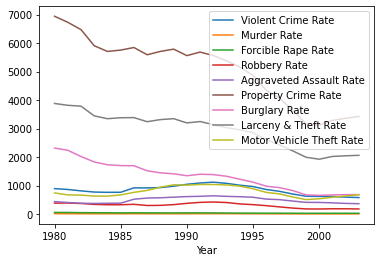

In [230]:

lines = california_crimes_by_year.iloc[:,2:].plot.line()


## It's still your turn ... to make another plot
* We can't clearly see the trends for the lines that are below 1000  on the y-axis. How about generate another plot, including data for all years, and excluse data for burglary, larceny, and property.

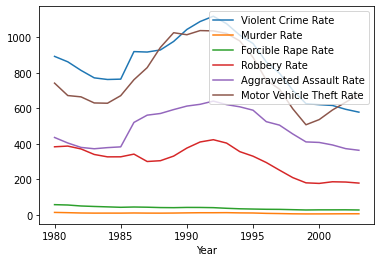

In [248]:
# Your code here . . . 
lines = california_crimes_by_year.loc[:, ['Violent Crime Rate', 'Murder Rate', 'Forcible Rape Rate', 'Robbery Rate', 'Aggraveted Assault Rate', 'Motor Vehicle Theft Rate']].plot.line()

## One more plot
Create a line plot for all states to show the California population number over the years. Year will be on horizontal axis and population number will be on the y-axis. Remove the legend from the plot.

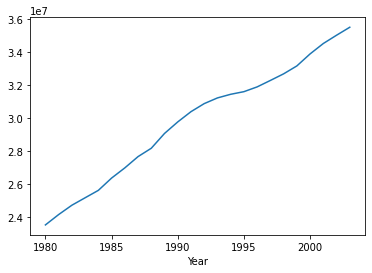

In [252]:
# Your code here . . .

lines = california_crimes_by_year.iloc[:,1].plot.line()